## HEART ATTACK PREDICTION & ANALYSIS 

Heart Attack happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.

#### Symptoms of Heart Attack:
* Severe pressure, fullness, squeezing, pain, or discomfort in the center of the chest that lasts for more than a few minutes
* Pain or discomfort that spreads to the shoulders, neck, arms, or jaw
* Chest pain that gets worse
* Chest pain that doesn't get better with rest
* Symptoms like:Sweating, cool, clammy skin, or paleness,Shortness of breath,Nausea or vomiting ,Dizziness or fainting ,Unexplained weakness or fatigue,Rapid or irregular pulse.

### IMPORTING THE DEPENDENCIES

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

* Pandas is a library which is used for data cleaning and analysis. It has features which are used for exploring, cleaning, transforming and visualizing from data.
* NumPy is a very popular python library for large multi-dimensional array and matrix processing, with the help of a large collection of high-level mathematical functions.
* Matplotlib is a data visualization library helps to generate histograms, plots, error charts, scatter plots, bar charts with just a few lines of code.
* Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

### DATA COLLECTION AND PROCESSING

In [2]:
#importing the dataset 
heart_data = pd.read_csv('./heart.csv')

#### We will use the heart attack dataset containing following parameters, to predict the chances of heart attack in patients:
* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
heart_data.head()
#heart_data.head() gives the default first 5 values of the dataset.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()
#data.tail() gives the default last 5 values of the dataset.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.duplicated().sum()
#shows the count of duplicated values

1

In [6]:
heart_data.drop_duplicates(inplace = True)
#drops the values of duplicates

In [7]:
df=heart_data.copy()
#copies the new data in which duplicates are dropped and stored in a dataframe

In [8]:
df.duplicated().sum()
#shows the count of duplicated values.Here count of duplicated values is 0.So,we can proceed with the dataset.

0

In [9]:
df.head()
#prints the first five default values

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape
#it represents number of rows and columns in the dataset.

(302, 14)

In [11]:
df.size
#it represnts size of the dataset. 

4228

In [12]:
df.columns
#it represents number of columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [13]:
df.rename(columns={"age": "Age", 
                    "sex": "Gender",
                    "cp": "ChestPainType",
                    "trtbps": "RestingBP",
                    "chol": "Cholesterol",
                    "fbs": "FastingBS",
                    "restecg": "RestingECG",
                    "thalachh": "MaxHR",
                    "exng": "ExerciseAngina",
                    "oldpeak":"oldpeak",
                    "slp": "ST_Slope",
                    "caa":"Number of major vessels",
                    "thall":"Thalium Stress Test",
                    "output": "HeartDisease"},inplace = True)
#it renames the columns of the dataset with the assigned names.

In [14]:
df.describe()
#df.describe() gives the statistical measures about the data

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test,HeartDisease
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.info()
#df.info() gives the information about the data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      302 non-null    int64  
 1   Gender                   302 non-null    int64  
 2   ChestPainType            302 non-null    int64  
 3   RestingBP                302 non-null    int64  
 4   Cholesterol              302 non-null    int64  
 5   FastingBS                302 non-null    int64  
 6   RestingECG               302 non-null    int64  
 7   MaxHR                    302 non-null    int64  
 8   ExerciseAngina           302 non-null    int64  
 9   oldpeak                  302 non-null    float64
 10  ST_Slope                 302 non-null    int64  
 11  Number of major vessels  302 non-null    int64  
 12  Thalium Stress Test      302 non-null    int64  
 13  HeartDisease             302 non-null    int64  
dtypes: float64(1), int64(13)
m

In [16]:
df['HeartDisease'].unique()
# it represents the number of unique values in the HeartDisease column.

array([1, 0], dtype=int64)

In [17]:
df.isnull().sum()
#to check whether there are any null values in the dataset.

Age                        0
Gender                     0
ChestPainType              0
RestingBP                  0
Cholesterol                0
FastingBS                  0
RestingECG                 0
MaxHR                      0
ExerciseAngina             0
oldpeak                    0
ST_Slope                   0
Number of major vessels    0
Thalium Stress Test        0
HeartDisease               0
dtype: int64

### EXPLORATORY DATA ANALYSIS(EDA) AND DATA VISUALIZATION

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

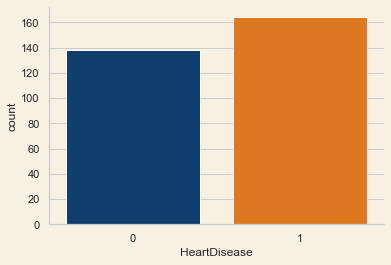

In [18]:
sns.set(style = 'whitegrid' ,rc={'axes.facecolor':'#f8f0e3', 'figure.facecolor':'#f8f0e3', "axes.spines.right": False, "axes.spines.top": False})
sns.countplot(x='HeartDisease', data=df, palette=["#003F7D", "#FD7702"])
#here count plot reprents the count of the people who have more/less chances of getting heart attack.

* Using seaborn we have plotted a count plot which gives information about the output i.e if output=0 it represents persons who are having less chances of heart atttack,if output=1 it represents persons who are having more chances of heart atttack.

In [19]:
df.columns

Index(['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'oldpeak',
       'ST_Slope', 'Number of major vessels', 'Thalium Stress Test',
       'HeartDisease'],
      dtype='object')

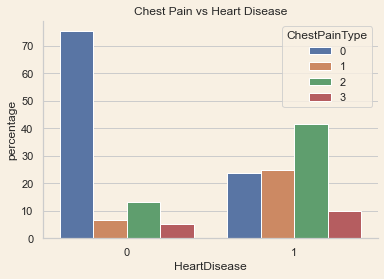

In [20]:
temp = (df.groupby(['HeartDisease']))['ChestPainType'].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
sns.barplot(x = "HeartDisease", y = "percentage", hue = "ChestPainType", data = temp).set_title("Chest Pain vs Heart Disease")
plt.show()

Text(0.5, 1.0, 'FastingBS vs Heart Disease')

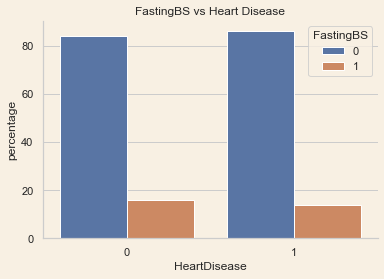

In [21]:
temp = (df.groupby(['HeartDisease']))['FastingBS'].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
sns.barplot(x = "HeartDisease", y = "percentage", hue = "FastingBS", data = temp).set_title("FastingBS vs Heart Disease")

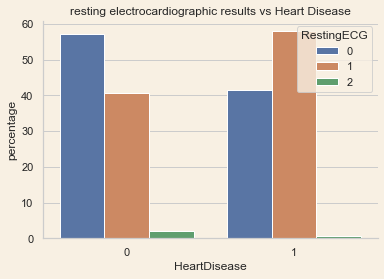

In [22]:
temp = (df.groupby(['HeartDisease']))['RestingECG'].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
sns.barplot(x = "HeartDisease", y = "percentage", hue = "RestingECG", data = temp).set_title("resting electrocardiographic results vs Heart Disease")
plt.show()

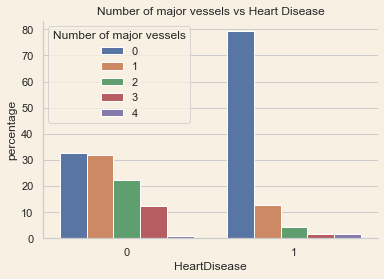

In [23]:
temp = (df.groupby(['HeartDisease']))['Number of major vessels'].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
sns.barplot(x = "HeartDisease", y = "percentage", hue = "Number of major vessels", data = temp).set_title("Number of major vessels vs Heart Disease")
plt.show()

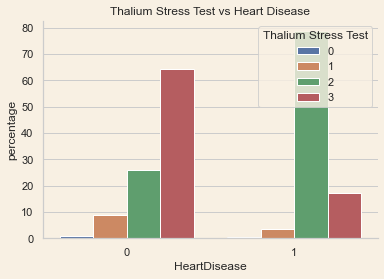

In [24]:
temp = (df.groupby(['HeartDisease']))['Thalium Stress Test'].value_counts(normalize=True).mul(100).reset_index(name = "percentage")
sns.barplot(x = "HeartDisease", y = "percentage", hue = "Thalium Stress Test", data = temp).set_title("Thalium Stress Test vs Heart Disease")
plt.show()  

In [19]:
df['HeartDisease'].value_counts()
# it represents the numerical count of the values in the column HeartDisease.

1    164
0    138
Name: HeartDisease, dtype: int64

* 1 ---> Defective Heart(represents persons who are having more chances of heart atttack.)
* 0 ---> Healthy Heart(represents persons who are having less chances of heart atttack.)

* As we can see the target variable is not unevenly distributed, so we can use accuracy as the metric for model performance.

In [20]:
#Converting gender column into string representation of male-female to help in visualizations
#Splitting the age column into ranges for neat and clean visualizations
df['range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60 ,70, 80])
df['M/F'] = df['Gender'].apply(lambda x : 'male' if x == 1 else 'female')
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test,HeartDisease,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


<AxesSubplot:xlabel='M/F', ylabel='count'>

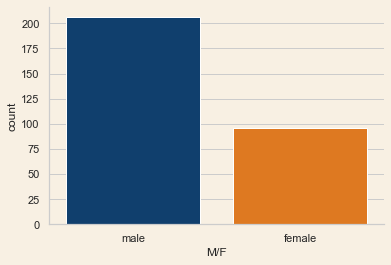

In [21]:
# countplot represents the graphical representation and visualizatiob of number of male and female in the dataset. 
sns.countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

In [22]:
df['M/F'].value_counts()
#it represents the count of number of male-female in the dataset. 
#The dataset is unevenly distributed in terms of male-female ratio.

male      206
female     96
Name: M/F, dtype: int64

<AxesSubplot:xlabel='range', ylabel='count'>

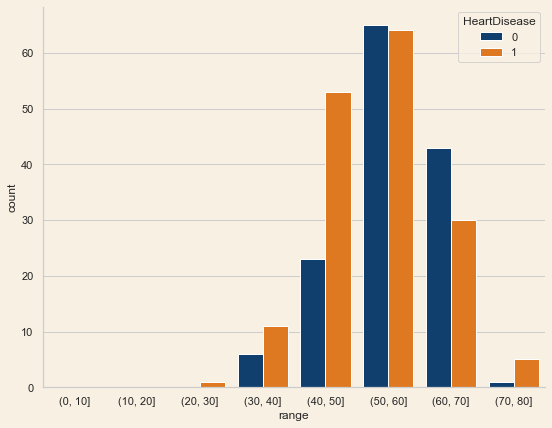

In [23]:
#represents count of 'Age vs HeartDisease'
plt.figure(figsize=(9, 7))
sns.countplot(x='range', data = df, hue='HeartDisease', palette=["#003F7D", "#FD7702"])

* People in the age range of 50-60 have higher chances of heart attack.

<AxesSubplot:xlabel='M/F', ylabel='count'>

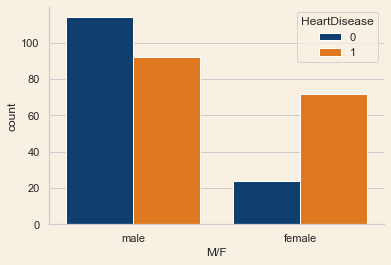

In [24]:
#represents count of 'Gender vs HeartDisease'
sns.countplot(x='M/F', data = df, hue = 'HeartDisease', palette=["#003F7D", "#FD7702"])

In [25]:
#here grouping by male and female and checking count of the people who are having chances of heartattack.
df.groupby(['M/F', 'HeartDisease'])['HeartDisease'].count()

M/F     HeartDisease
female  0                24
        1                72
male    0               114
        1                92
Name: HeartDisease, dtype: int64

* As we can see from the above bar chart, male have more chances of heart attack than compared to female

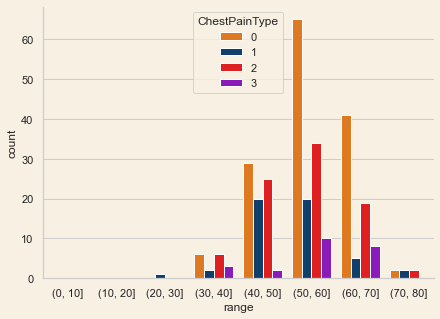

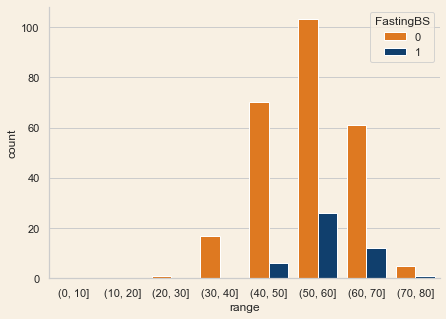

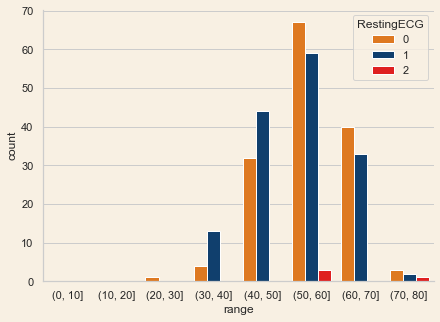

In [26]:
#Age vs ChestPainType
#age vs RestingBP
#age vs CholestroL
#age vs Fasting_blood_sugar
#age vs resting_electrocardiographic
#age vs maximum_heart_rate_acheived
cat_attribute = ['ChestPainType','FastingBS', 'RestingECG']
num_attribute = ['RestingBP', 'Cholesterol', 'MaxHR']

for i in cat_attribute:
    plt.figure(figsize=(7, 5))
    sns.countplot(x='range', data = df, hue=i, palette=["#FD7702","#003F7D", '#FF0000', '#9400D4'])

* As we can see from the above bar chart, people with the age of 50-60 have high chest pain(cp),fasting blood sugar(fbs) and resting electrocardiographic results(restecg).

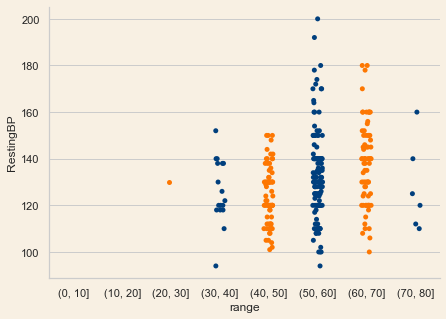

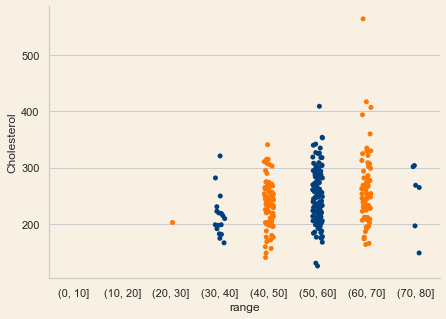

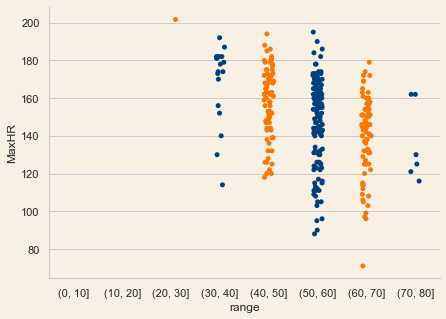

In [27]:
#shows the graphical visualization of the following attributes
for i in num_attribute:
    plt.figure(figsize=(7, 5))
    sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])

In [28]:
#grouping by the range and checking the different count in the following features.
df.groupby('range')['RestingBP', 'Cholesterol', 'MaxHR'].count()

,RestingBP,Cholesterol,MaxHR
range,,,
"(0, 10]",0,0,0
"(10, 20]",0,0,0
"(20, 30]",1,1,1
"(30, 40]",17,17,17
"(40, 50]",76,76,76
"(50, 60]",129,129,129
"(60, 70]",73,73,73
"(70, 80]",6,6,6


* Age group of 50-60 has more instances of people having high resting blood pressure(trtbps), cholestrol(chol) and heart rate(thalachh).

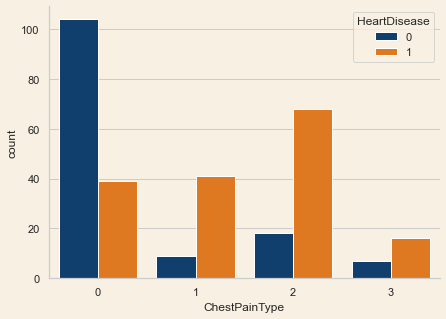

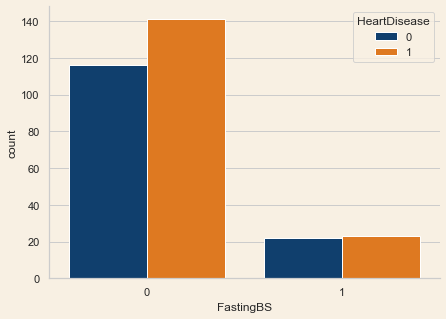

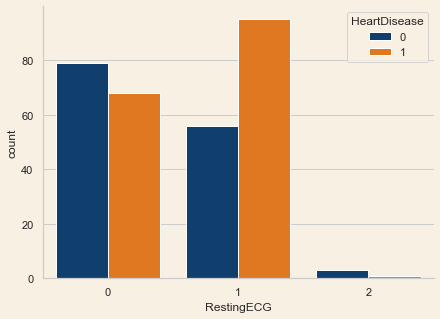

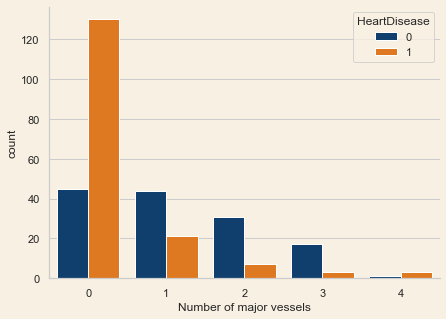

In [29]:
#output vs age
#output vs chestpain
#output vs resting_blood_pressure
#output vs cholestrol_in_mg
#output vs fasting_blood_sugar
#output vs resting_electrocardigraphic
#output vs maximum_heart_rate_acheived
#output vs previous_peak
#output vs number_od_major_vessels

cat_attr = ['ChestPainType', 'FastingBS', 'RestingECG', 'Number of major vessels']
num_attr = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'oldpeak']

for i in cat_attr:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=i, data = df, hue='HeartDisease', palette=["#003F7D", "#FD7702"])

* People having chest pain(cp) type 2 : atypical angina have high chances of heart attack.
* People with blood sugar less than 120 mg/dl have chances of heart attack.
* People with resting electrocardiographic results of value 1 : having ST-T wave abnormality have high chances of heart attack.
* People with caa type 0 have high chances of heart attack.

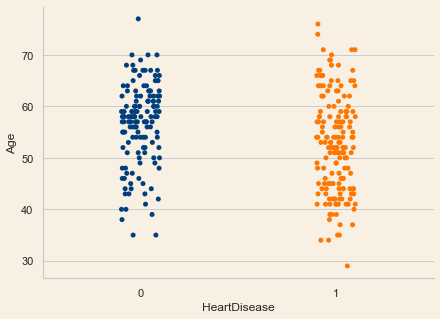

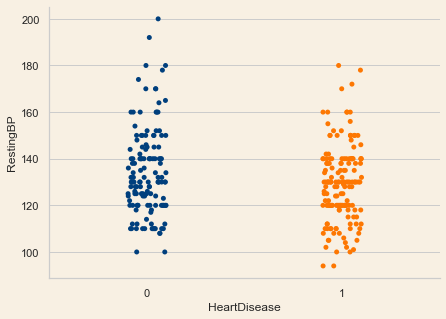

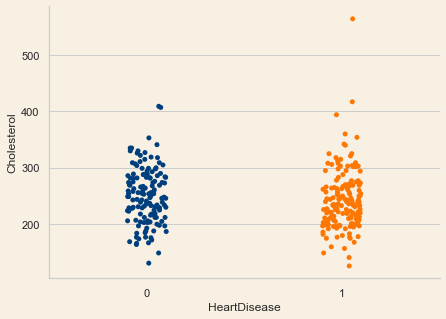

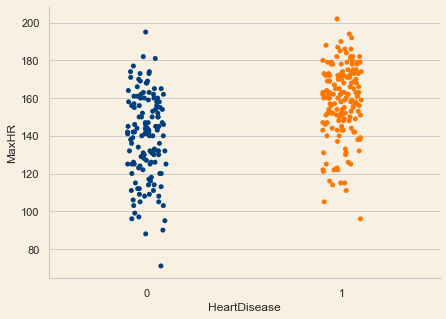

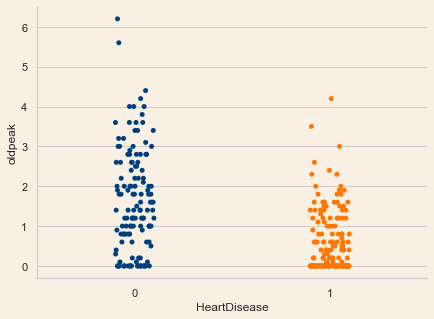

In [30]:
#shows the graphical visualization of the following attributes
for i in num_attr:
    plt.figure(figsize=(7, 5))
    sns.stripplot(x='HeartDisease', y = i, data = df, palette=["#003F7D", "#FD7702"])

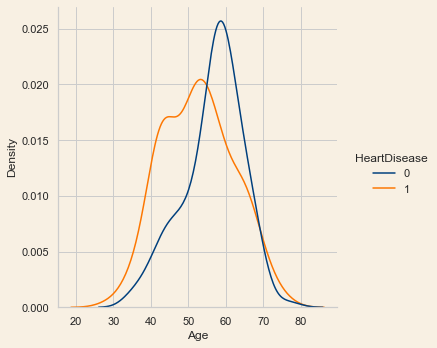

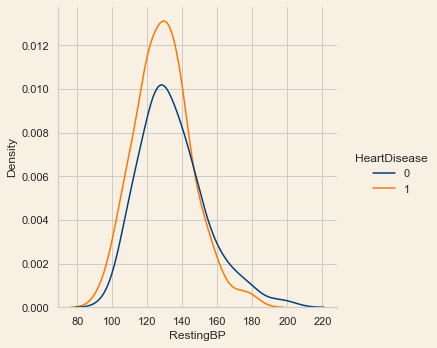

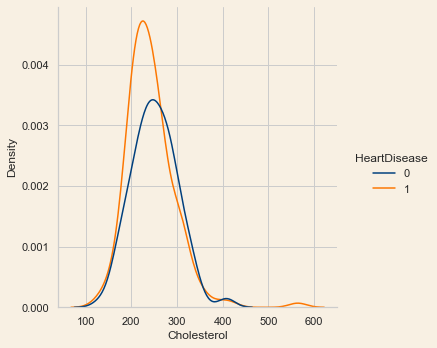

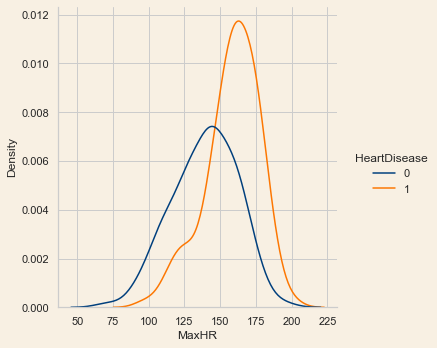

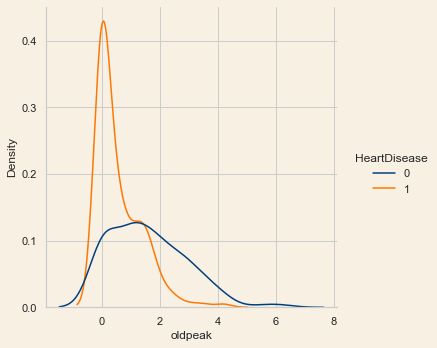

In [31]:
#Distribution of numeric features with the target variable.
parameters = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'oldpeak']
for i in parameters:
    sns.displot(x = i, data=df, hue = 'HeartDisease', kind = 'kde', palette=["#003F7D", "#FD7702"])

In [32]:
#Correlation of features with respect to target variable
corr_matrix = df.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease               1.000000
ChestPainType              0.432080
MaxHR                      0.419955
ST_Slope                   0.343940
RestingECG                 0.134874
FastingBS                 -0.026826
Cholesterol               -0.081437
RestingBP                 -0.146269
Age                       -0.221476
Gender                    -0.283609
Thalium Stress Test       -0.343101
Number of major vessels   -0.408992
oldpeak                   -0.429146
ExerciseAngina            -0.435601
Name: HeartDisease, dtype: float64

<AxesSubplot:>

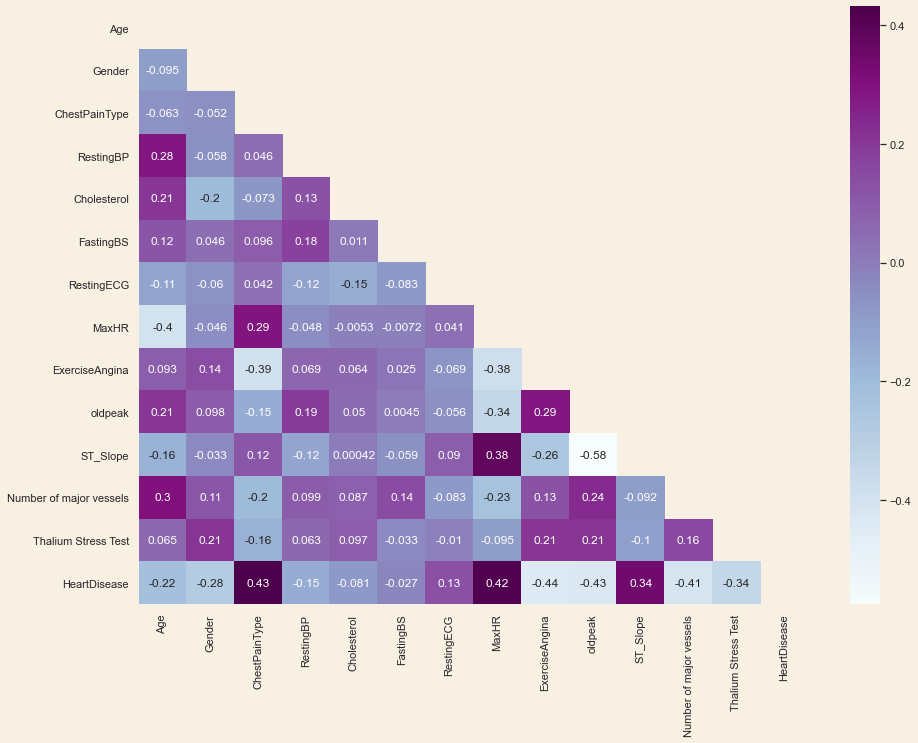

In [33]:
#heatmap(2 dimensional representation of info with the help of colors).
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap = 'BuPu')

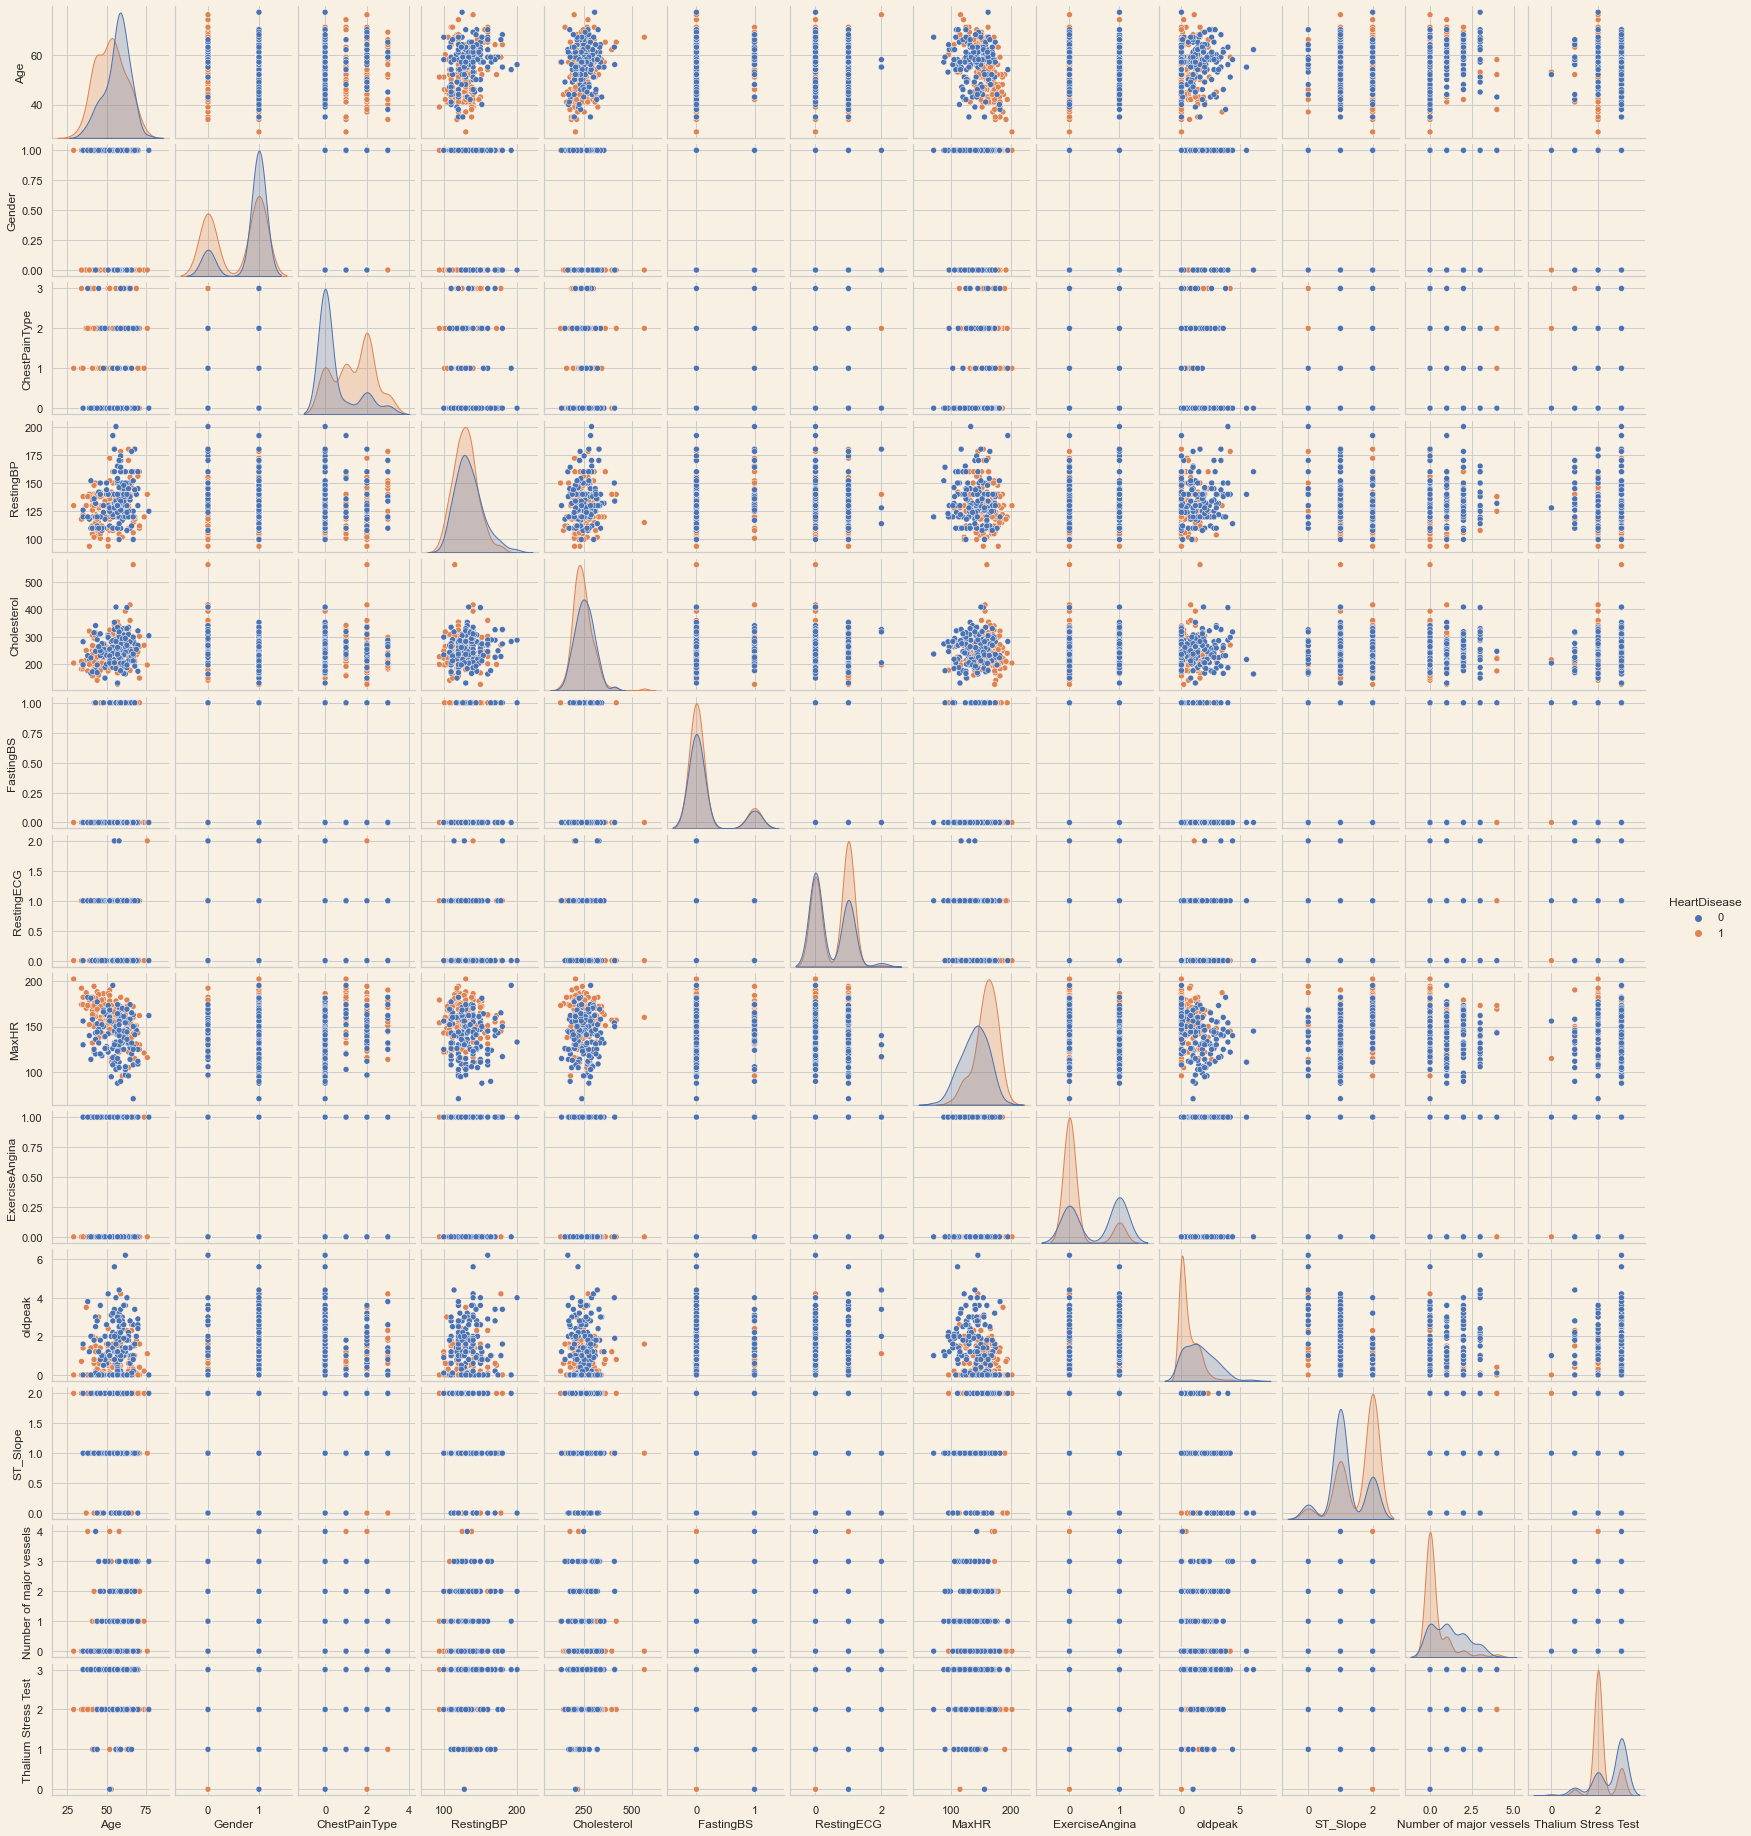

In [34]:
#data visualization using pairplot
features = ['Age', 'Gender', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'oldpeak',
       'ST_Slope', 'Number of major vessels', 'Thalium Stress Test','HeartDisease']
sns.pairplot(df[features], hue = 'HeartDisease', height = 2, aspect=0.9)

### MODEL BUILDING

In [35]:
df.head()
#represnts the first five rows of the dataset. 

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test,HeartDisease,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


In [36]:
#dropping the range and M/F columns added earlier.
#drop() removing the specified row or column.
df = df.drop(['range', 'M/F'], axis = 1)
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### SPLITTING THE FEATURES AND THE TARGET

In [37]:
#seperating the dependent variable from the independent variable
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease'].values

In [38]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

### SPLITTING THE DATA INTO TRAINING AND TESTING DATA

In [39]:
#Splitting the data into train and test data;
# training data is 80% and testing data is 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train     #prints the training dataset

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [41]:
X_test      #prints the testing dataset

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2


In [42]:
y_train   #prints the training dataset

array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [43]:
y_test       #prints the testing dataset

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Imbalanced Data

In [44]:
#(SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (241, 13)
Number transactions y_train dataset:  (241,)
Number transactions X_test dataset:  (61, 13)
Number transactions y_test dataset:  (61,)


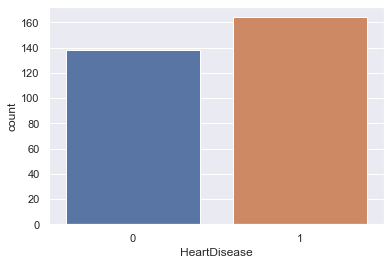

In [45]:
#this for imbalanced graph.
sns.set_theme(style="darkgrid")
sns.countplot(x="HeartDisease", data=df)
plt.show()

In [46]:
# ! pip install imblearn

In [72]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_test_res, y_test_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res == 0)))



Before OverSampling, counts of label '1': 132
Before OverSampling, counts of label '0': 109 

After OverSampling, the shape of train_X: (264, 13)
After OverSampling, the shape of train_y: (264,) 

After OverSampling, counts of label '1': 132
After OverSampling, counts of label '0': 132


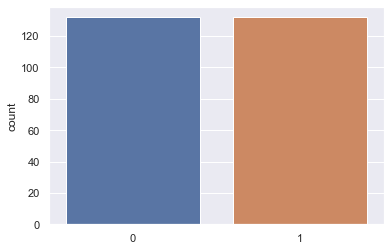

In [73]:
#for balanced graph
sns.set_theme(style="darkgrid")
sns.countplot(x=y_test_res, data=df)
plt.show()

### MODEL TRAINING AND EVALUATION USING ACCURACY SCORE

### The algorithms which we are going to implement are:
* 1.Naive Bayes
* 2.Decision Tree
* 3.Logistic Regression
* 4.Random Forest
* 5.SVM

### GAUSSIAN NAIVE BAYES ALGORITHM

In [50]:
#importing Gaussian Naive Bayes algorithm from sklearn library
#creating the model and checking the accuracy,classification report
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_test,y_test)

predicted_values1 = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values1)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values1))

Naive Bayes's Accuracy is:  90.1639344262295
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        29
           1       0.88      0.94      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



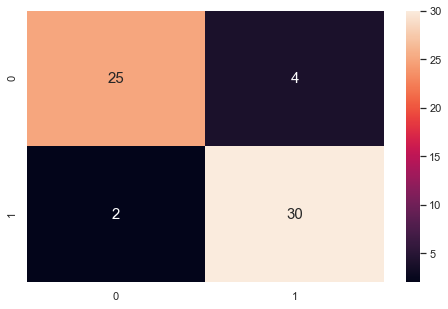

In [51]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5))
cm_NB=confusion_matrix(y_test, predicted_values1)
plot= sns.heatmap(data=cm_NB, annot=True)
#represents the confusion matrix of Gaussian Naive Bayes algorithm

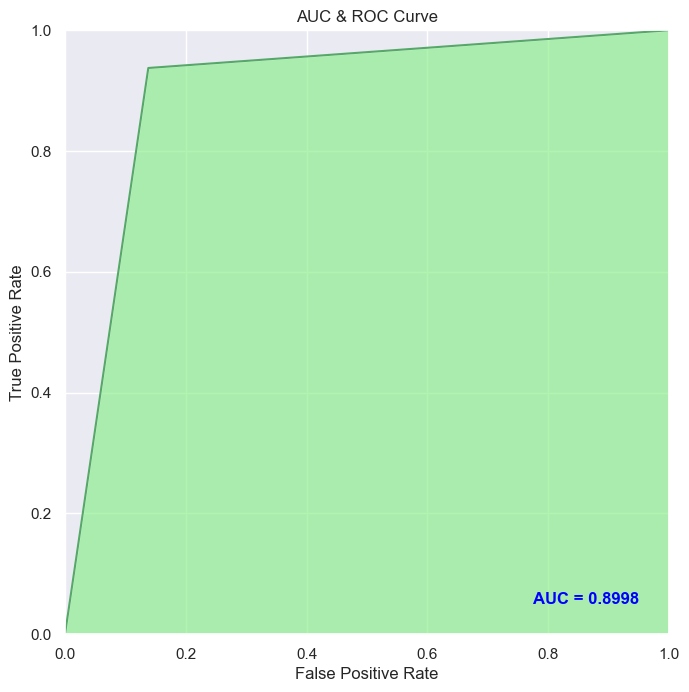

In [80]:
auc = metrics.roc_auc_score(y_test, predicted_values1)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted_values1)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### DECISION TREE ALGORITHM

In [52]:
#importing Decision Tree algorithm from sklearn library
#creating the model and checking the accuracy,classification report
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=143,max_depth=5)

DecisionTree.fit(X_test,y_test)

predicted_values2 = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values2)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values2))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



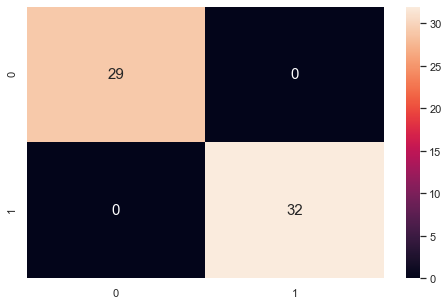

In [53]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5))
cm_DT=confusion_matrix(y_test, predicted_values2)
plot= sns.heatmap(data=cm_DT, annot=True)
#represents the confusion matrix of Decision Tree algorithm

### LOGISTIC REGRESSION

In [54]:
#importing Logistic Regression algorithm from sklearn library
#creating the model and checking the accuracy,classification report
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_test,y_test)

predicted_values3 = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values3)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)
print(classification_report(y_test,predicted_values3))

Logistic Regression's Accuracy is:  91.80327868852459
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.91      0.94      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



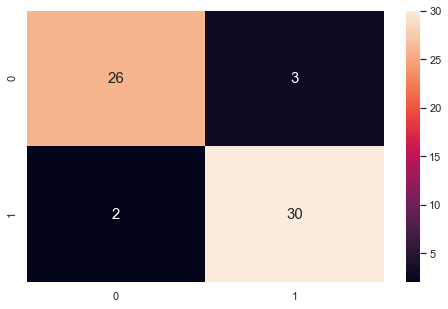

In [55]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5))
cm_LR=confusion_matrix(y_test, predicted_values3)
plot= sns.heatmap(data=cm_LR, annot=True)
#represents the confusion matrix of Logistic Regression algorithm

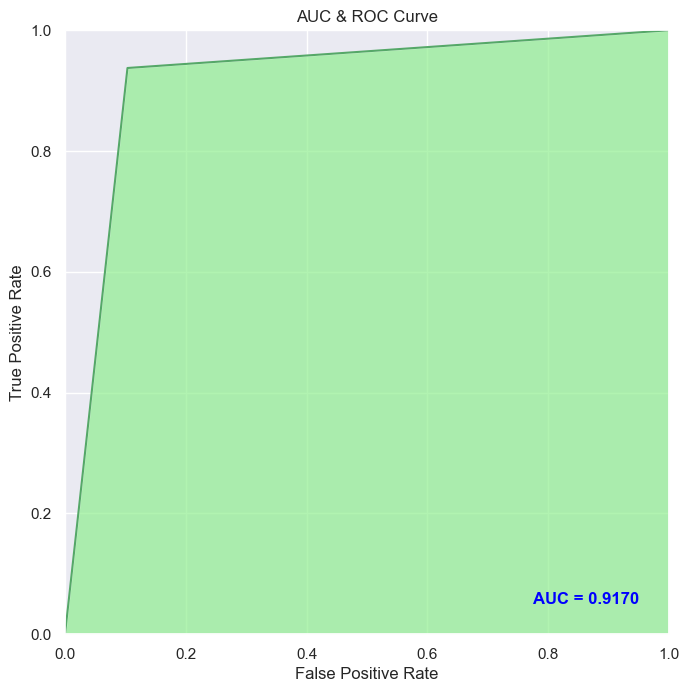

In [77]:
auc = metrics.roc_auc_score(y_test, predicted_values3)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted_values3)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### RANDOM FOREST ALGORITHM

In [56]:
#importing Random Forest algorithm from sklearn library
#creating the model and checking the accuracy,classification report
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_test,y_test)

predicted_values4 = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values4)
acc.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values4))

Random Forest's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



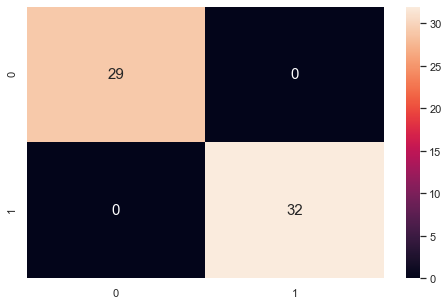

In [75]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5))
cm_RF=confusion_matrix(y_test, predicted_values4)
plot= sns.heatmap(data=cm_RF, annot=True)
#represents the confusion matrix of Random Forest algorithm

### SUPPORT VECTOR MACHINE ALGORITHM

In [58]:
#importing Support Vector Machine algorithm from sklearn library
#creating the model and checking the accuracy,classification report
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(X_train,y_train)
predicted_values5 = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values5)
acc.append(x)
model.append('Support Vector Machine')
print("Support Vector Machine's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values5))

Support Vector Machine's Accuracy is:  85.24590163934425
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



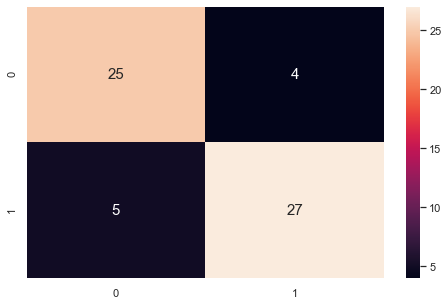

In [59]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,5))
cm_SVM=confusion_matrix(y_test, predicted_values5)
plot= sns.heatmap(data=cm_SVM, annot=True)
#represents the confusion matrix of Support Vector Machine algorithm

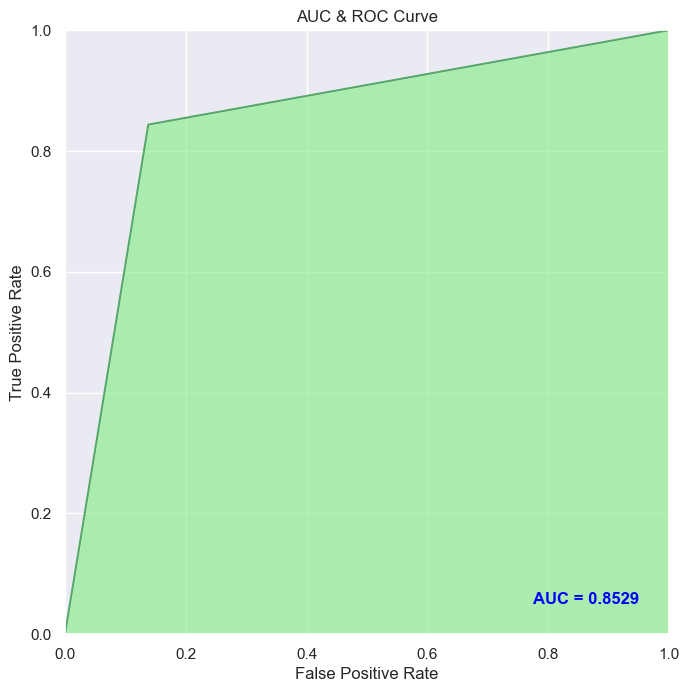

In [61]:

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predicted_values5)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted_values5)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### ACCURACY COMPARISION

<AxesSubplot:title={'center':'Accuracy Comparison for 80%-20%'}, xlabel='Algorithms', ylabel='Accuracy'>

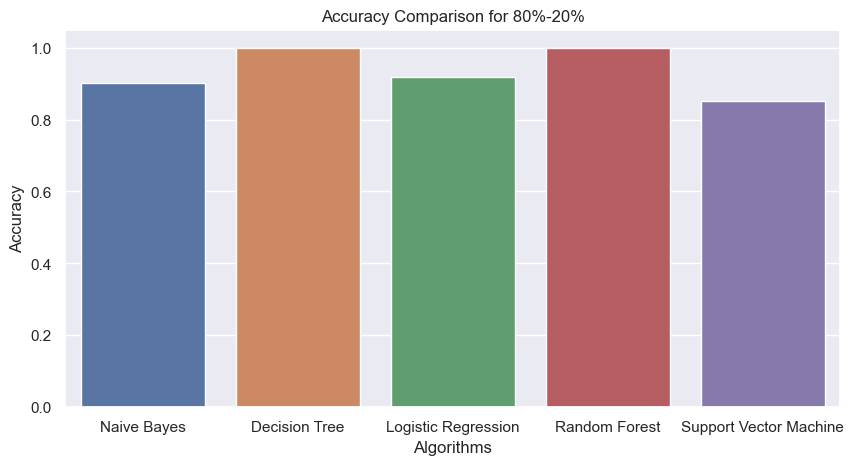

In [62]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison for 80%-20%')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc)
#shows the accuracy comparision of all the implemented ml algorithms in graphical representation.

In [63]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v*100)
#shows the accuracy comparision of all the implemented ml algorithms in numerical representation

Naive Bayes --> 90.1639344262295
Decision Tree --> 100.0
Logistic Regression --> 91.80327868852459
Random Forest --> 100.0
Support Vector Machine --> 85.24590163934425


### MAKE A PREDICTION

* 1 ---> Defective Heart(represents persons who are having more chances of heart atttack.)
* 0 ---> Healthy Heart(represents persons who are having less chances of heart atttack.)

In [64]:
data = np.array([[64,1,3,110,211,0,0,144,1,1.8,1,0,2]])
prediction = RF.predict(data)
print(prediction) 
#predicted 1 for the above data, represents the person have more chances of getting heart attack.

[1]


In [65]:
data = np.array([[70,1,2,160,269,0,1,112,1,2.9,1,1,3]])
prediction = NaiveBayes.predict(data)
print(prediction)
#predicted 0 for the above data ,represents the person have less chances of getting heart attack.

[0]


In [66]:
data = np.array([[59,1,1,140,221,0,1,164,1,0,2,0,2]])
prediction = DecisionTree.predict(data)
print(prediction)
#predicts 1 for the above data, represents the person have more chances of getting heart attack.

[1]


In [67]:
data = np.array([[52,1,3,152,298,1,1,178,0,1.2,1,0,3]])
prediction = LogReg.predict(data)
print(prediction)
#predicts 1 for the above data, represents the person have more chances of getting heart attack.

[1]


In [68]:
data = np.array([[64,1,0,120,246,0,0,96,1,2.2,0,1,2]])
prediction = SVM.predict(data)
print(prediction)
#predicts 0 for the above data, represents the person have more chances of getting heart attack.

[0]


In [69]:
df.head(20)

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,oldpeak,ST_Slope,Number of major vessels,Thalium Stress Test,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## PROJECT COMPLETED By
### NUKALA VAISHNAVI(AP19110010487)
#### EMAIL: vaishnavi_nukala@srmap.edu.in
### K.Lahari(AP19110010548)
### EMAIL: kondamurilahari_k@srmap.edu.in
### K.Geetika(AP19110010123)
### EMAIL: geetika_gopinadh@srmap.edu.in
### G.Sai Sushma(AP19110010551)
### saisushma_gurram@srmap.edu.in